# Shariq Mian

# Introduction:
In this email classification project, the focus was on differentiating between spam and ham (non-spam) emails using a random forest classifier. The implementation involved utilizing the CountVectorizer and TfidfTransformer from scikit-learn for text preprocessing and feature extraction. The dataset consisted of emails sourced from various channels, including ham emails, spam emails, and Gmail emails. The emails' text was combined and labeled accordingly. The data was then split into training and testing sets, with the random forest classifier trained on the training set. Predictions were made on the test set, and the classifier's performance was evaluated through accuracy calculation and the creation of a confusion matrix. Additionally, word clouds were generated to visually highlight the most common words found in ham and spam emails.

In [1]:
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from wordcloud import WordCloud

In [4]:
# Set the paths
ham_path = "/content/drive/MyDrive/Projects_Data/easy_ham"
spam_path = "/content/drive/MyDrive/Projects_Data/spam_2"
gmail_path = "/content/drive/MyDrive/Projects_Data/Gmail"
gmail1_path = "/content/drive/MyDrive/Projects_Data/Gmail1"

# Get the list of files in the directories
ham_list = os.listdir(ham_path)
spam_list = os.listdir(spam_path)
gmail_list = os.listdir(gmail_path)
gmail1_list = os.listdir(gmail1_path)

# Read ham emails
ham_text = []
for filename in ham_list:
    path = os.path.join(ham_path, filename)
    with open(path, 'r', encoding='latin-1') as file:
        text = file.read()
        ham_text.append(text)

# Read spam emails
spam_text = []
for filename in spam_list:
    path = os.path.join(spam_path, filename)
    with open(path, 'r', encoding='latin-1') as file:
        text = file.read()
        spam_text.append(text)

# Read Gmail emails
gmail_text = []
for filename in gmail_list:
    path = os.path.join(gmail_path, filename)
    with open(path, 'r', encoding='latin-1') as file:
        text = file.read()
        gmail_text.append(text)

# Read Gmail1 emails
gmail1_text = []
for filename in gmail1_list:
    path = os.path.join(gmail1_path, filename)
    with open(path, 'r', encoding='latin-1') as file:
        text = file.read()
        gmail1_text.append(text)

# Combine all the email text
email_text = ham_text + spam_text + gmail_text + gmail1_text
labels = np.concatenate((np.zeros(len(ham_text)), np.ones(len(spam_text)),
                         np.ones(len(gmail_text)), np.zeros(len(gmail1_text))))


In [5]:
# Preprocess the email text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(email_text)
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X)


In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, labels, test_size=0.2, random_state=1024)

# Train the random forest classifier
classifier = RandomForestClassifier(n_estimators=3)
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy and confusion matrix
accuracy = np.mean(y_pred == y_test)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)


Accuracy: 0.9680284191829485
Confusion Matrix:
[[289  10]
 [  8 256]]


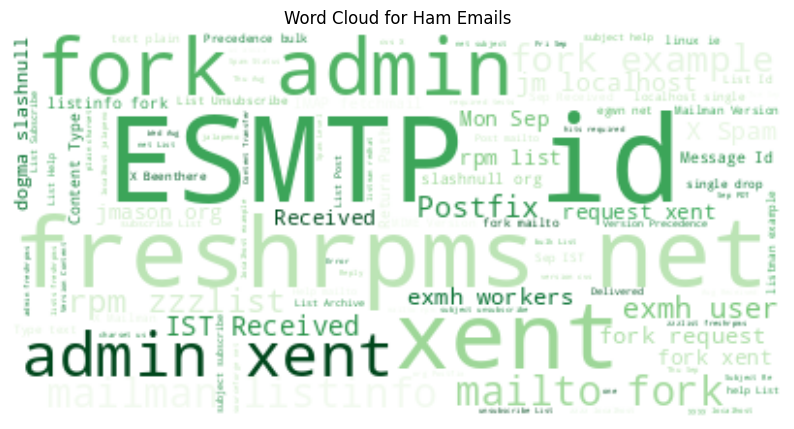

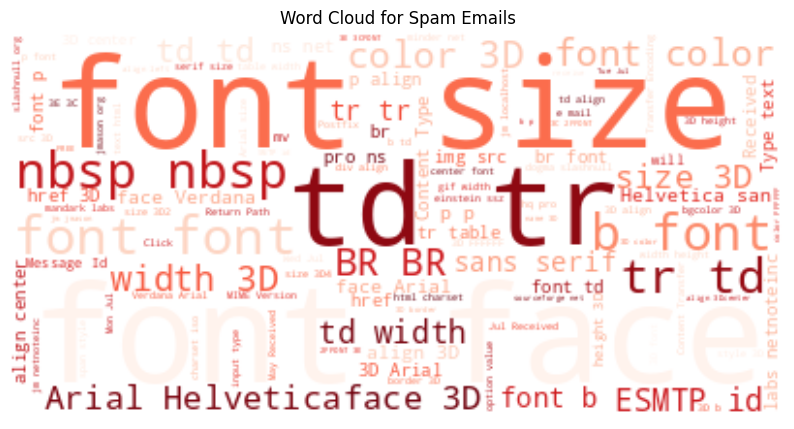

In [13]:
# Word cloud for ham emails
ham_wordcloud = WordCloud(max_words=200, background_color='white', colormap='Greens').generate(' '.join(ham_text))
plt.figure(figsize=(10, 8))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ham Emails')
plt.show()

# Word cloud for spam emails
spam_wordcloud = WordCloud(max_words=200, background_color='white', colormap='Reds').generate(' '.join(spam_text))
plt.figure(figsize=(10, 8))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Emails')
plt.show()


# Conclusion
Through this email classification project, the objective was to develop a system capable of categorizing emails as spam or ham. The implementation process involved several stages, including data preprocessing, feature extraction, model training, and evaluation. By leveraging the random forest classifier and employing text analysis techniques, I successfully achieved the classification task.


In summary, this email classification project allowed for the differentiation of spam and ham emails using a random forest classifier. By exploring various aspects of the data and employing machine learning techniques, valuable insights were gained into the effectiveness of the classifier and the prevalent characteristics of ham and spam emails.